# Network Analysis in python (part 1)

#### Networks!

* Examples:
    * Social
    * Transportation
 
* Model relationships between entities

* Insights:
    * Important entities: influencers in social network
    * Pathfinding: most efficient transport path
    * Clustering: finding communities

In [1]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from([1, 2, 3])
G.nodes()

NodeView((1, 2, 3))

In [2]:
G.add_edge(1, 2)
G.edges()

EdgeView([(1, 2)])

In [3]:
G.node[1]['label'] = 'blue'
G.nodes(data=True)

NodeDataView({1: {'label': 'blue'}, 2: {}, 3: {}})

/usr/lib/pymodules/python2.7/matplotlib/collections.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != 'face':
/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


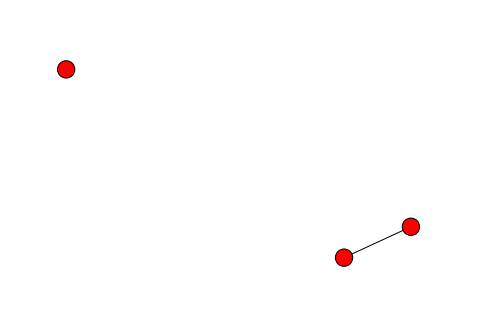

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

nx.draw(G)

#### Example: Queries on a graph

Now that you know some basic properties of the graph and have practiced using NetworkX's drawing facilities to visualize components of it, it's time to explore how you can query it for nodes and edges. Specifically, you're going to look for "nodes of interest" and "edges of interest". To achieve this, you'll make use of the .nodes() and .edges() methods that Eric went over in the video. The .nodes() method returns a list of nodes, while the .edges() method returns a list of tuples, in which each tuple shows the nodes that are present on that edge. Recall that passing in the keyword argument data=True in these methods retrieves the corresponding metadata associated with the nodes and edges as well.

You'll write list comprehensions to effectively build these queries in one line. For a refresher on list comprehensions, refer to Part 2 of DataCamp's Python Data Science Toolbox course. Here's the recipe for a list comprehension:

[ output expression __for__ iterator variable __in__ iterable __if__ predicate expression ].

You have to fill in the _iterable_ and the _predicate expression_. Feel free to prototype your answer by exploring the graph in the IPython Shell before submitting your solution.

```python
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < date(2010, 1, 1)]
```

#### Types of graphs

* Undirected graphs (Facebook social graph)
    * O ----- O

In [5]:
type(G)

networkx.classes.graph.Graph

* Directed graphs (Directed: Twi er social graph)
    * O -----> O

In [6]:
D = nx.DiGraph()
type(D)

networkx.classes.digraph.DiGraph

* Multi(Di)Graph: Trip records between bike sharing stations
    * O =====> O

In [7]:
M = nx.MultiGraph()
type(M)

networkx.classes.multigraph.MultiGraph

In [8]:
MD = nx.MultiDiGraph()
type(MD)

networkx.classes.multidigraph.MultiDiGraph

__Edges can contain weights__

* Self-loops: Nodes that are connected to themselves

#### Example: Specifying a weight on edges

Weights can be added to edges in a graph, typically indicating the "strength" of an edge. In NetworkX, the weight is indicated by the 'weight' key in the metadata dictionary.

```python
# Set the 'weight' attribute of the edge between node 1 and 10 of T to be equal to 2
T.edge[1][10]['weight'] = 2

# Iterate over all the edges (with metadata)
# Set the weight of every edge involving node 293 to be equal to 1.1
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u, v]:
    
        # Set the weight to 1.1
        T.edge[u][v]['weight'] = 1.1
```

#### Example: Checking whether there are self-loops in the graph

NetworkX also allows edges that begin and end on the same node; while this would be non-intuitive for a social network graph, it is useful to model data such as trip networks, in which individuals begin at one location and end in another.

It is useful to check for this before proceeding with further analyses, and NetworkX graphs provide a method for this purpose: __.number_of_selfloops()__.

In this exercise as well as later ones, you'll find the __assert__ statement useful. An __assert__-ions checks whether the statement placed after it evaluates to True, otherwise it will return an AssertionError.

```python
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []
    
    # Iterate over all the edges of G
    for u, v in G.edges():
    
    # Check if node u and node v are the same
        if u==v:
        
            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)
            
    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
assert T.number_of_selfloops() == len(find_selfloop_nodes(T))
```

#### Visualizing networks

* Matrix plots
* Arc plots
* Circos plots

```python
import nxviz as nv
ap = nv.ArcPlot(G)
ap.draw()
```

#### Example: Visualizing using Matrix plots

It is time to try your first "fancy" graph visualization method: a matrix plot. To do this, __nxviz__ provides a __MatrixPlot__ object.

nxviz is a package for visualizing graphs in a rational fashion. Under the hood, the MatrixPlot utilizes __nx.to_numpy_matrix(G)__, which returns the matrix form of the graph. Here, each node is one column and one row, and an edge between the two nodes is indicated by the value 1. In doing so, however, only the _weight metadata is preserved_; all other metadata is lost, as you'll verify using an assert statement.

A corresponding __nx.from_numpy_matrix(A)__ allows one to quickly create a graph from a NumPy matrix. The default graph type is Graph(); if you want to make it a DiGraph(), that has to be specified using the create_using keyword argument, e.g. (__nx.from_numpy_matrix(A, create_using=nx.DiGraph)__).

```python
# Import nxviz
import nxviz as nv

# Create the MatrixPlot object: m
m = nv.MatrixPlot(T)

# Draw m to the screen
m.draw()

# Display the plot
plt.show()

# Convert T to a matrix format: A
A = nx.to_numpy_matrix(T)

# Convert A back to the NetworkX form as a directed graph: T_conv
T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# Check that the `category` metadata field is lost from each node
for n, d in T_conv.nodes(data=True):
    assert 'category' not in d.keys()
```

#### Example: Visualizing using Circos plots

Circos plots are a rational, non-cluttered way of visualizing graph data, in which nodes are ordered around the circumference in some fashion, and the edges are drawn within the circle that results, giving a beautiful as well as informative visualization about the structure of the network.

```python
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import CircosPlot

# Create the CircosPlot object: c
c = CircosPlot(T)

# Draw c to the screen
c.draw()

# Display the plot
plt.show()
```

#### Example: Visualizing using Arc plots

Following on what you've learned about the nxviz API, now try making an ArcPlot of the network. Two keyword arguments that you will try here are __node_order='keyX'__ and __node_color='keyX'__, in which you specify a key in the node metadata dictionary to color and order the nodes by.

```python
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import ArcPlot

# Create the un-customized ArcPlot object: a
a = ArcPlot(T)

# Draw a to the screen
a.draw()

# Display the plot
plt.show()

# Create the customized ArcPlot object: a2
a2 = ArcPlot(T,node_order='category', node_color='category')

# Draw a2 to the screen
a2.draw()

# Display the plot
plt.show()
```